In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import pymongo
import dns
%matplotlib inline

In [32]:
combined_results = 'combined_results.csv'
data = pd.read_csv(combined_results)

In [33]:
data.head()

,last name,fips,county,votes,state,total votes,winner,percent votes,PST045214,PST040210,...,carbon_tax,north_korea_meet,free_college,children_public,ban_fracking,border_crossing_penalties,medicare_for_all,private_insurance,eliminate_electoral_college,eliminate_filibuster
0,Biden,1131,Wilcox,1864,AL,2148,1,0.867784,11098,11665,...,1,0,0,0,0,1,0,0,0,0
1,Sanders,1131,Wilcox,284,AL,2148,0,0.132216,11098,11665,...,0,1,1,1,1,0,1,1,1,1
2,Biden,1129,Washington,1109,AL,1265,1,0.876680,16834,17583,...,1,0,0,0,0,1,0,0,0,0
3,Sanders,1129,Washington,156,AL,1265,0,0.123320,16834,17583,...,0,1,1,1,1,0,1,1,1,1
4,Biden,1127,Walker,1390,AL,1928,1,0.720954,65471,67023,...,1,0,0,0,0,1,0,0,0,0


In [34]:
training_data = data.drop(['last name', 'fips', 'county', 'state', 'votes', 'total votes', 'percent votes'], axis=1)
training_data.head()

,winner,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,...,carbon_tax,north_korea_meet,free_college,children_public,ban_fracking,border_crossing_penalties,medicare_for_all,private_insurance,eliminate_electoral_college,eliminate_filibuster
0,1,11098,11665,-4.9,11670,5.7,24.8,17.7,52.4,28.1,...,1,0,0,0,0,1,0,0,0,0
1,0,11098,11665,-4.9,11670,5.7,24.8,17.7,52.4,28.1,...,0,1,1,1,1,0,1,1,1,1
2,1,16834,17583,-4.3,17581,4.9,22.5,17.0,51.2,66.0,...,1,0,0,0,0,1,0,0,0,0
3,0,16834,17583,-4.3,17581,4.9,22.5,17.0,51.2,66.0,...,0,1,1,1,1,0,1,1,1,1
4,1,65471,67023,-2.3,67023,5.8,22.1,18.2,51.4,91.3,...,1,0,0,0,0,1,0,0,0,0


In [35]:
training_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
winner,2392.0,5.004181e-01,5.001044e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
PST045214,2392.0,1.063537e+05,4.070559e+05,8.600000e+01,1.201250e+04,2.539600e+04,6.288375e+04,1.011670e+07
PST040210,2392.0,1.016935e+05,3.887405e+05,8.200000e+01,1.216550e+04,2.519850e+04,6.120325e+04,9.818664e+06
PST120214,2392.0,8.110368e-01,4.350972e+00,-1.700000e+01,-2.000000e+00,1.000000e-01,3.000000e+00,1.820000e+01
POP010210,2392.0,1.016856e+05,3.887336e+05,8.200000e+01,1.216550e+04,2.520150e+04,6.123500e+04,9.818605e+06
AGE135214,2392.0,5.937793e+00,1.209163e+00,1.900000e+00,5.200000e+00,5.900000e+00,6.600000e+00,1.040000e+01
AGE295214,2392.0,2.272818e+01,3.438428e+00,1.060000e+01,2.060000e+01,2.270000e+01,2.450000e+01,3.540000e+01
AGE775214,2392.0,1.749515e+01,4.367039e+00,7.200000e+00,1.450000e+01,1.750000e+01,2.002500e+01,3.520000e+01
SEX255214,2392.0,4.996271e+01,2.410079e+00,3.010000e+01,4.960000e+01,5.050000e+01,5.110000e+01,5.500000e+01
RHI125214,2392.0,8.375510e+01,1.532602e+01,1.670000e+01,7.675000e+01,8.975000e+01,9.490000e+01,9.880000e+01


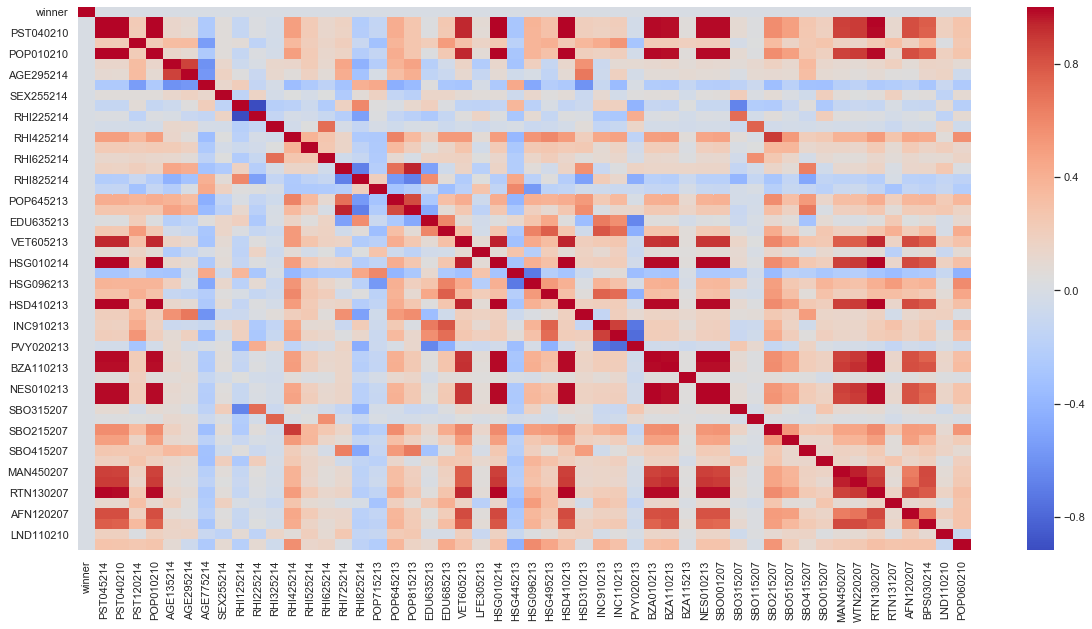

In [36]:


plt.figure(figsize=(20,10))

sns.heatmap(training_data[['winner', 'PST045214', 'PST040210', 'PST120214', 'POP010210',
       'AGE135214', 'AGE295214', 'AGE775214', 'SEX255214', 'RHI125214',
       'RHI225214', 'RHI325214', 'RHI425214', 'RHI525214', 'RHI625214',
       'RHI725214', 'RHI825214', 'POP715213', 'POP645213', 'POP815213',
       'EDU635213', 'EDU685213', 'VET605213', 'LFE305213', 'HSG010214',
       'HSG445213', 'HSG096213', 'HSG495213', 'HSD410213', 'HSD310213',
       'INC910213', 'INC110213', 'PVY020213', 'BZA010213', 'BZA110213',
       'BZA115213', 'NES010213', 'SBO001207', 'SBO315207', 'SBO115207',
       'SBO215207', 'SBO515207', 'SBO415207', 'SBO015207', 'MAN450207',
       'WTN220207', 'RTN130207', 'RTN131207', 'AFN120207', 'BPS030214',
       'LND110210', 'POP060210']].corr(), cmap='coolwarm')

In [37]:
training_data.columns

Index(['winner', 'PST045214', 'PST040210', 'PST120214', 'POP010210',
       'AGE135214', 'AGE295214', 'AGE775214', 'SEX255214', 'RHI125214',
       'RHI225214', 'RHI325214', 'RHI425214', 'RHI525214', 'RHI625214',
       'RHI725214', 'RHI825214', 'POP715213', 'POP645213', 'POP815213',
       'EDU635213', 'EDU685213', 'VET605213', 'LFE305213', 'HSG010214',
       'HSG445213', 'HSG096213', 'HSG495213', 'HSD410213', 'HSD310213',
       'INC910213', 'INC110213', 'PVY020213', 'BZA010213', 'BZA110213',
       'BZA115213', 'NES010213', 'SBO001207', 'SBO315207', 'SBO115207',
       'SBO215207', 'SBO515207', 'SBO415207', 'SBO015207', 'MAN450207',
       'WTN220207', 'RTN130207', 'RTN131207', 'AFN120207', 'BPS030214',
       'LND110210', 'POP060210', 'Age', 'Gender', 'Net Worth',
       '% Donations Under $200', 'Candidate Committee Money', 'Outside Money',
       'Twitter Followers', 'legalize_cannabis', 'vote_incarcerated',
       'gun_licenses', 'tax_wealthy_assets', 'paid_family_leave',
     

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = training_data.drop('winner',axis=1)
y = training_data['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [40]:

from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc = RandomForestClassifier(n_estimators=600)

In [42]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
predictions = rfc.predict(X_test)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[323  41]
 [ 32 322]]


              precision    recall  f1-score   support

           0       0.91      0.89      0.90       364
           1       0.89      0.91      0.90       354

    accuracy                           0.90       718
   macro avg       0.90      0.90      0.90       718
weighted avg       0.90      0.90      0.90       718



In [46]:
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), X.columns), 
             reverse=True))

Features sorted by their score:
[(0.0537, 'LND110210'), (0.0504, 'RHI225214'), (0.0295, 'HSG495213'), (0.0269, 'EDU635213'), (0.0206, 'RHI125214'), (0.0202, 'POP815213'), (0.0196, 'RHI725214'), (0.0187, 'HSG445213'), (0.0182, 'free_college'), (0.0177, 'HSG096213'), (0.0169, 'SEX255214'), (0.0168, 'RHI325214'), (0.0166, 'POP645213'), (0.0163, 'Outside Money'), (0.0161, 'EDU685213'), (0.0155, 'POP060210'), (0.0153, 'private_insurance'), (0.015, 'RHI825214'), (0.015, 'RHI425214'), (0.0145, 'POP715213'), (0.0145, 'AGE295214'), (0.014, 'LFE305213'), (0.0136, 'eliminate_filibuster'), (0.0134, 'ban_fracking'), (0.0134, 'AFN120207'), (0.0132, 'paid_family_leave'), (0.0132, 'HSD310213'), (0.0128, 'INC110213'), (0.0127, 'job_guarantee'), (0.0124, 'Twitter Followers'), (0.0123, 'RHI525214'), (0.0121, 'Candidate Committee Money'), (0.0118, 'raise_income_tax'), (0.0118, 'RTN131207'), (0.0116, 'cancel_student_debt'), (0.0115, 'PVY020213'), (0.0115, 'INC910213'), (0.0115, 'AGE135214'), (0.0112, 'medi

In [47]:
feature_importances = pd.DataFrame({"Feature Names": X.columns, "Importances": rfc.feature_importances_}).sort_values(by="Importances", ascending=False)

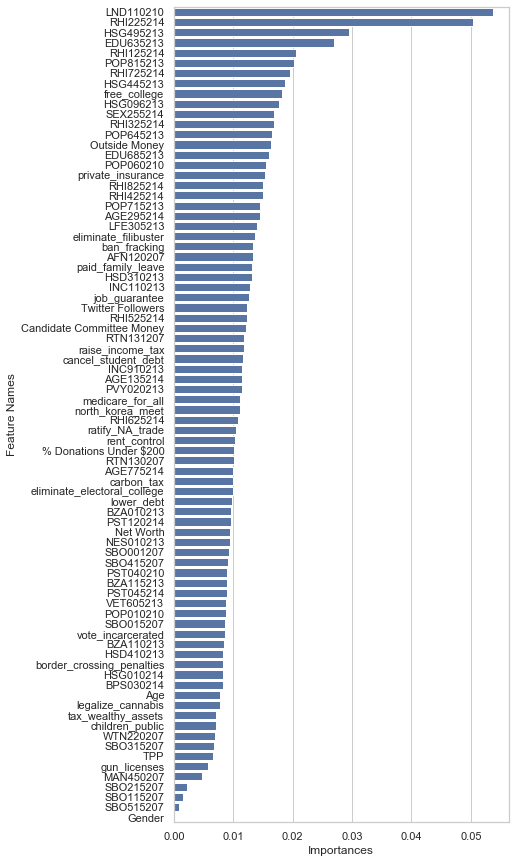

In [48]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="Importances", y="Feature Names", data=feature_importances,
            label="Total", color="b")

In [49]:
predictions_df = pd.read_csv('predictions.csv')

In [50]:

predictions_data = predictions_df.drop(['state', 'state_abbreviation', 'county', 'fips','candidate'], axis=1)
predictions_data.head()

,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,...,carbon_tax,north_korea_meet,free_college,children_public,ban_fracking,border_crossing_penalties,medicare_for_all,private_insurance,eliminate_electoral_college,eliminate_filibuster
0,55395,54571,1.5,54571,6.0,25.2,13.8,51.4,77.9,18.7,...,0,1,1,1,1,0,1,1,1,1
1,55395,54571,1.5,54571,6.0,25.2,13.8,51.4,77.9,18.7,...,1,0,0,0,0,1,0,0,0,0
2,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,87.1,9.6,...,0,1,1,1,1,0,1,1,1,1
3,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,87.1,9.6,...,1,0,0,0,0,1,0,0,0,0
4,26887,27457,-2.1,27457,5.7,21.2,16.5,46.6,50.2,47.6,...,0,1,1,1,1,0,1,1,1,1


In [51]:
predictions = rfc.predict(predictions_data)

In [52]:
predictions

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [53]:
predictions_df['predicted winner'] = predictions
predictions_df.head()

,state,state_abbreviation,county,fips,candidate,PST045214,PST040210,PST120214,POP010210,AGE135214,...,north_korea_meet,free_college,children_public,ban_fracking,border_crossing_penalties,medicare_for_all,private_insurance,eliminate_electoral_college,eliminate_filibuster,predicted winner
0,Alabama,AL,Autauga,1001,Sanders,55395,54571,1.5,54571,6.0,...,1,1,1,1,0,1,1,1,1,0
1,Alabama,AL,Autauga,1001,Biden,55395,54571,1.5,54571,6.0,...,0,0,0,0,1,0,0,0,0,1
2,Alabama,AL,Baldwin,1003,Sanders,200111,182265,9.8,182265,5.6,...,1,1,1,1,0,1,1,1,1,0
3,Alabama,AL,Baldwin,1003,Biden,200111,182265,9.8,182265,5.6,...,0,0,0,0,1,0,0,0,0,1
4,Alabama,AL,Barbour,1005,Sanders,26887,27457,-2.1,27457,5.7,...,1,1,1,1,0,1,1,1,1,0


In [54]:
predictions_df.to_csv('prediction_results.csv')

In [55]:
winner_counts = predictions_df.groupby(['candidate', 'state'])['predicted winner'].sum().reset_index()

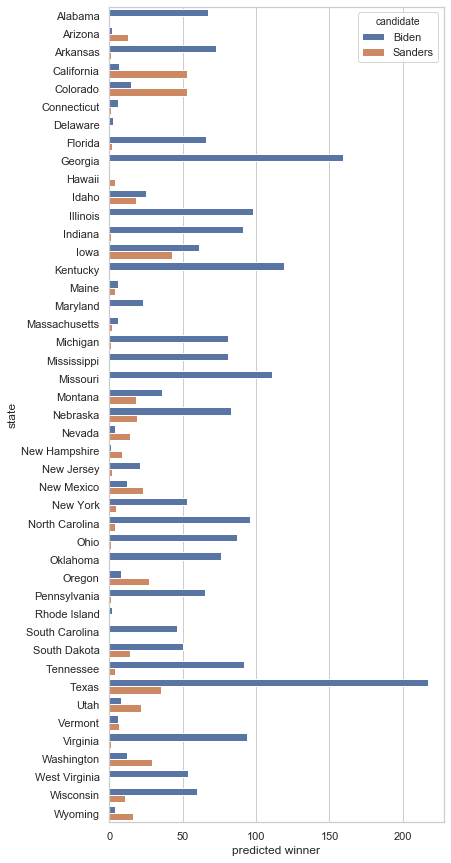

In [56]:
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="predicted winner", y = 'state', data = winner_counts, hue = 'candidate')

In [57]:
fips = predictions_df['fips'].unique()

In [60]:
predictions_df.head()

,state,state_abbreviation,county,fips,candidate,PST045214,PST040210,PST120214,POP010210,AGE135214,...,north_korea_meet,free_college,children_public,ban_fracking,border_crossing_penalties,medicare_for_all,private_insurance,eliminate_electoral_college,eliminate_filibuster,predicted winner
0,Alabama,AL,Autauga,1001,Sanders,55395,54571,1.5,54571,6.0,...,1,1,1,1,0,1,1,1,1,0
1,Alabama,AL,Autauga,1001,Biden,55395,54571,1.5,54571,6.0,...,0,0,0,0,1,0,0,0,0,1
2,Alabama,AL,Baldwin,1003,Sanders,200111,182265,9.8,182265,5.6,...,1,1,1,1,0,1,1,1,1,0
3,Alabama,AL,Baldwin,1003,Biden,200111,182265,9.8,182265,5.6,...,0,0,0,0,1,0,0,0,0,1
4,Alabama,AL,Barbour,1005,Sanders,26887,27457,-2.1,27457,5.7,...,1,1,1,1,0,1,1,1,1,0


In [61]:
data.head()

,last name,fips,county,votes,state,total votes,winner,percent votes,PST045214,PST040210,...,carbon_tax,north_korea_meet,free_college,children_public,ban_fracking,border_crossing_penalties,medicare_for_all,private_insurance,eliminate_electoral_college,eliminate_filibuster
0,Biden,1131,Wilcox,1864,AL,2148,1,0.867784,11098,11665,...,1,0,0,0,0,1,0,0,0,0
1,Sanders,1131,Wilcox,284,AL,2148,0,0.132216,11098,11665,...,0,1,1,1,1,0,1,1,1,1
2,Biden,1129,Washington,1109,AL,1265,1,0.876680,16834,17583,...,1,0,0,0,0,1,0,0,0,0
3,Sanders,1129,Washington,156,AL,1265,0,0.123320,16834,17583,...,0,1,1,1,1,0,1,1,1,1
4,Biden,1127,Walker,1390,AL,1928,1,0.720954,65471,67023,...,1,0,0,0,0,1,0,0,0,0


In [80]:
actual_data = data[['fips', 'winner', 'percent votes', 'last name']]
actual_data.columns.values[3] = "candidate"

In [81]:
actual_data.head()

,fips,winner,percent votes,candidate
0,1131,1,0.867784,Biden
1,1131,0,0.132216,Sanders
2,1129,1,0.876680,Biden
3,1129,0,0.123320,Sanders
4,1127,1,0.720954,Biden


In [106]:
final_data = pd.merge(predictions_df, actual_data, how='left', on=['fips','candidate'])
final_data['winner'] = final_data['winner'].astype(pd.Int32Dtype())


In [107]:
final_data.head()

,state,state_abbreviation,county,fips,candidate,PST045214,PST040210,PST120214,POP010210,AGE135214,...,children_public,ban_fracking,border_crossing_penalties,medicare_for_all,private_insurance,eliminate_electoral_college,eliminate_filibuster,predicted winner,winner,percent votes
0,Alabama,AL,Autauga,1001,Sanders,55395,54571,1.5,54571,6.0,...,1,1,0,1,1,1,1,0,0,0.212452
1,Alabama,AL,Autauga,1001,Biden,55395,54571,1.5,54571,6.0,...,0,0,1,0,0,0,0,1,1,0.787548
2,Alabama,AL,Baldwin,1003,Sanders,200111,182265,9.8,182265,5.6,...,1,1,0,1,1,1,1,0,0,0.252654
3,Alabama,AL,Baldwin,1003,Biden,200111,182265,9.8,182265,5.6,...,0,0,1,0,0,0,0,1,1,0.747346
4,Alabama,AL,Barbour,1005,Sanders,26887,27457,-2.1,27457,5.7,...,1,1,0,1,1,1,1,0,0,0.096145


In [108]:
fips = final_data['fips'].unique()
len(fips)

2725

In [119]:
username = 'Terra925'
password = 'H%40mmond271'
conn = 'mongodb+srv://' + username +':' + password + '@cluster0-paegd.mongodb.net/test?retryWrites=true&w=majority'
client = pymongo.MongoClient(conn)
db = client['primary_predictions']
collection = db['results']

In [120]:
post = {
    'results': []
}


for fip in fips:
    df = final_data[final_data['fips'] == fip]
    predicted_winner = df[df['predicted winner'] == 1]['candidate']
    actual_winner = df[df['winner'] == 1]['candidate']
    try:
        predicted_winner = df[df['predicted winner'] == 1]['candidate']
        predicted_winner = predicted_winner.iloc[0]
    except:
        predicted_winner = 'Undetermined'
    try:
        predicted_loser = df[df['predicted winner'] == 0]['candidate']
        predicted_loser = predicted_loser.iloc[0]
    except:
        predicted_loser = 'Undetermined'
    try:
        actual_winner = df[df['winner'] == 1]['candidate']
        actual_winner = actual_winner.iloc[0]
    except:
        actual_winner = 'Undetermined'
    try:
        actual_loser = df[df['winner'] == 0]['candidate']
        actual_loser = actual_loser.iloc[0]
    except:
        actual_loser = 'Undetermined'
            
    obj = {
        'fip': int(fip),
        'state_abrv': str(df['state_abbreviation'].iloc[0]),
        'predicted_winner': str(predicted_winner),
        'predicted_loser': str(predicted_loser),
        'actual_winner': str(actual_winner),
        'actual_loser': str(actual_loser),
    }
    post['results'].append(obj)
id = collection.insert_one(post).inserted_id